# Load data

In [2]:
from yellowbrick.datasets.loaders import load_occupancy
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
import datapane as dp 
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')


/home/khuyentran/anaconda3/envs/scraping/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


I use a list to save all the plots and generate a report with Datapane. Make sure to log in [Datapane](https://datapane.com/) if you would like to create a [report of this notebook](https://datapane.com/khuyentran1401/reports/yellow_brick/)


In [3]:
report = []

In [4]:
X, y = load_occupancy()

In [5]:
X.head(10)

,temperature,relative humidity,light,CO2,humidity
0,23.180,27.2720,426.0,721.250000,0.004793
1,23.150,27.2675,429.5,714.000000,0.004783
2,23.150,27.2450,426.0,713.500000,0.004779
3,23.150,27.2000,426.0,708.250000,0.004772
4,23.100,27.2000,426.0,704.500000,0.004757
5,23.100,27.2000,419.0,701.000000,0.004757
6,23.100,27.2000,419.0,701.666667,0.004757
7,23.100,27.2000,419.0,699.000000,0.004757
8,23.100,27.2000,419.0,689.333333,0.004757
9,23.075,27.1750,419.0,688.000000,0.004745


In [6]:
report.append(dp.Table(pd.concat([X, y],axis=1)))

# Visualize the data

## Rank features

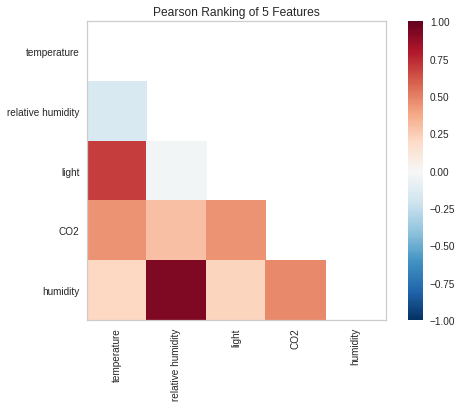

In [7]:
fig, ax = plt.subplots()
visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

In [8]:
report.append(dp.Plot(fig))

## Class balance

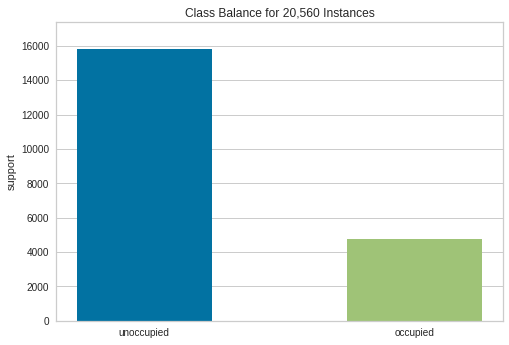

In [9]:
from yellowbrick.target import ClassBalance

fig, ax = plt.subplots()
visualizer = ClassBalance(labels=["unoccupied", "occupied"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [10]:
report.append(dp.Plot(fig))

# Visualize results of the model

## Find f1 score

In [11]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
pred = model.predict(X_test)

f1_score(y_test, pred)

0.9813041495668035

## Classification Report

In [12]:
from yellowbrick.classifier import classification_report

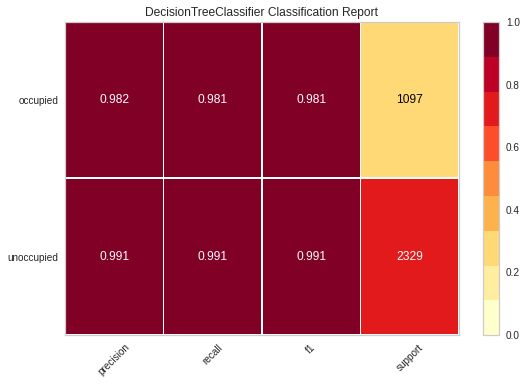

In [13]:
# Instantiate the visualizer
fig, ax = plt.subplots()

visualizer = classification_report(
    model, X_train, y_train, X_test, y_test, classes=classes, support=True
)

In [14]:
report.append(dp.Plot(fig))

## Confusion Matrix

In [15]:
from yellowbrick.classifier import ConfusionMatrix

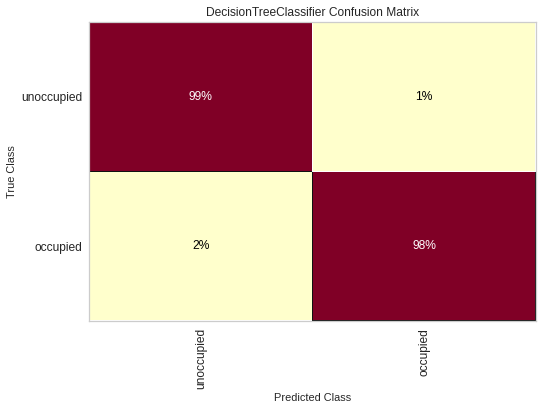

In [16]:
fig, ax = plt.subplots()

cm = ConfusionMatrix(model, classes=classes, percent=True)

cm.fit(X_train, y_train)

cm.score(X_test, y_test)

cm.show()

In [17]:
report.append(dp.Plot(fig))

## ROCAUC

A ROCAUC plot allows the user to visualize the tradeoff between the classifier’s sensitivity and specificity.

a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. 

The ideal point is therefore the top-left corner of the plot: false positives are zero and true positives are one.

The higher the area under the curve (AUC), the better the model generally is.

In [18]:
from yellowbrick.classifier import ROCAUC


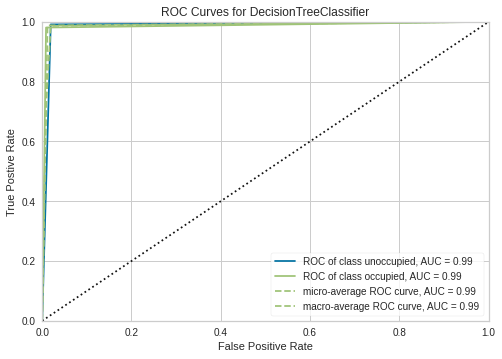

In [19]:
fig, ax = plt.subplots()

visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()                       


In [20]:
report.append(dp.Plot(fig))

## Class Prediction Error

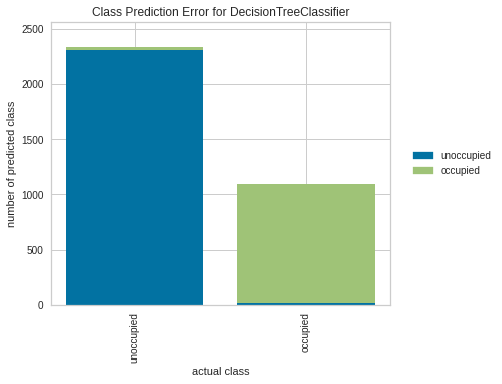

In [21]:
from yellowbrick.classifier import ClassPredictionError


# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(model, classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

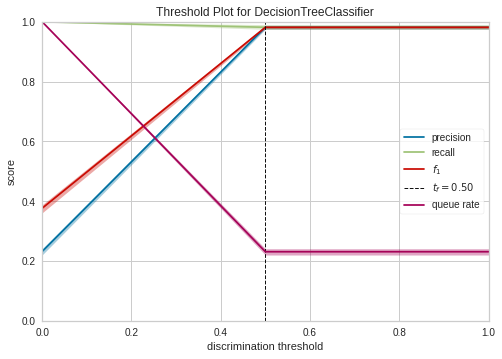

In [22]:
from yellowbrick.classifier import DiscriminationThreshold

fig, ax = plt.subplots()

visualizer = DiscriminationThreshold(model)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [23]:
report.append(dp.Plot(fig))

## Validation Curve

In [24]:
from yellowbrick.model_selection import validation_curve
import numpy as np 

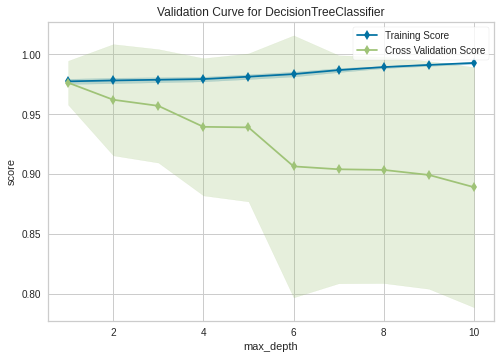

In [25]:
fig, ax = plt.subplots()

viz = validation_curve(
    model, X, y, param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="f1",
)

In [26]:
report.append(dp.Plot(fig))

## Learning Curve

In [27]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold


In [28]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

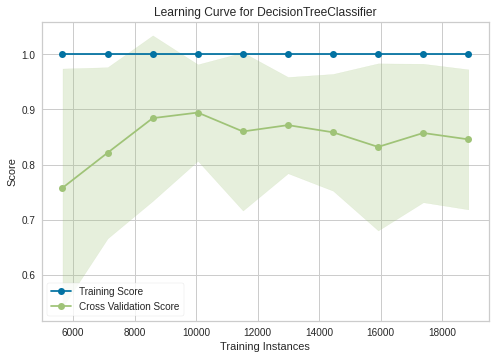

In [29]:
fig, ax = plt.subplots()

visualizer = LearningCurve(
    model, cv=cv, scoring='f1', train_sizes=sizes, 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [30]:
report.append(dp.Plot(fig))

## Cross Validation Scores

In [31]:
from yellowbrick.model_selection import CVScores


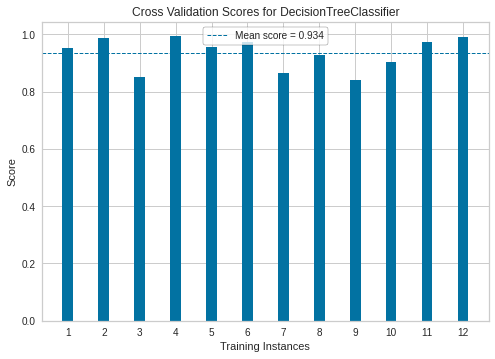

In [32]:
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

fig, ax = plt.subplots()

# Instantiate the classification model and visualizer
visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure


In [33]:
report.append(dp.Plot(fig))

## Feature Importances

This shows the features ranked according to the explained variance each feature contributes to the model.

In [34]:
from yellowbrick.model_selection import FeatureImportances


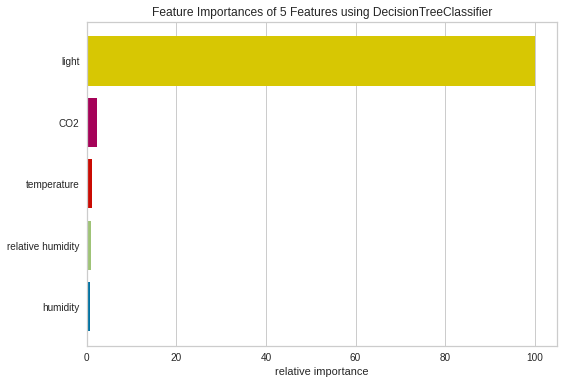

In [35]:
fig, ax = plt.subplots()

viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

In [36]:
report.append(dp.Plot(fig))

In [37]:
dp.Report(*report).publish(name='yellow_brick', visibily='PUBLIC')

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/khuyentran1401/reports/yellow_brick/
